In [1]:
%cd /Users/gwg/local/dmcm
%matplotlib inline

import torch
from   torchvision import transforms
from   torch.utils.data import DataLoader
from   torchvision.utils import save_image
from   torchvision.datasets import MNIST

import matplotlib
import matplotlib.pyplot as plt
from   matplotlib.offsetbox import OffsetImage, AnnotationBbox

from   data import SynthConfig, SynthDataset
from   models import VAE
import plotutils

/Users/gwg/local/dmcm


In [2]:
# dataset = MNIST('data/mnist',
#                 train=False,
#                 transform=transforms.ToTensor(),
#                 download=False)

# test_loader = DataLoader(dataset,
#                          batch_size=64,
#                          shuffle=True)

# state = torch.load('experiments/vae/mnist/model.pt')
# model = VAE(2)
# model.load_state_dict(state)

In [2]:
cfg = SynthConfig()
dataset = SynthDataset(cfg)
test_loader = DataLoader(dataset, batch_size=64, shuffle=True)

state = torch.load('experiments/vae/synth/model.pt')
model = VAE(2)
model.load_state_dict(state)

In [10]:
N       = 400
seed    = torch.zeros(2)
samples = torch.empty(N, 2)
inc     = 0.01

for i in range(400):
    samples[i][0] = seed[0] + (i * inc)

samples = model.decode(samples)
save_image(samples.view(N, 3, 32, 32), 'magic.png', nrow=20)

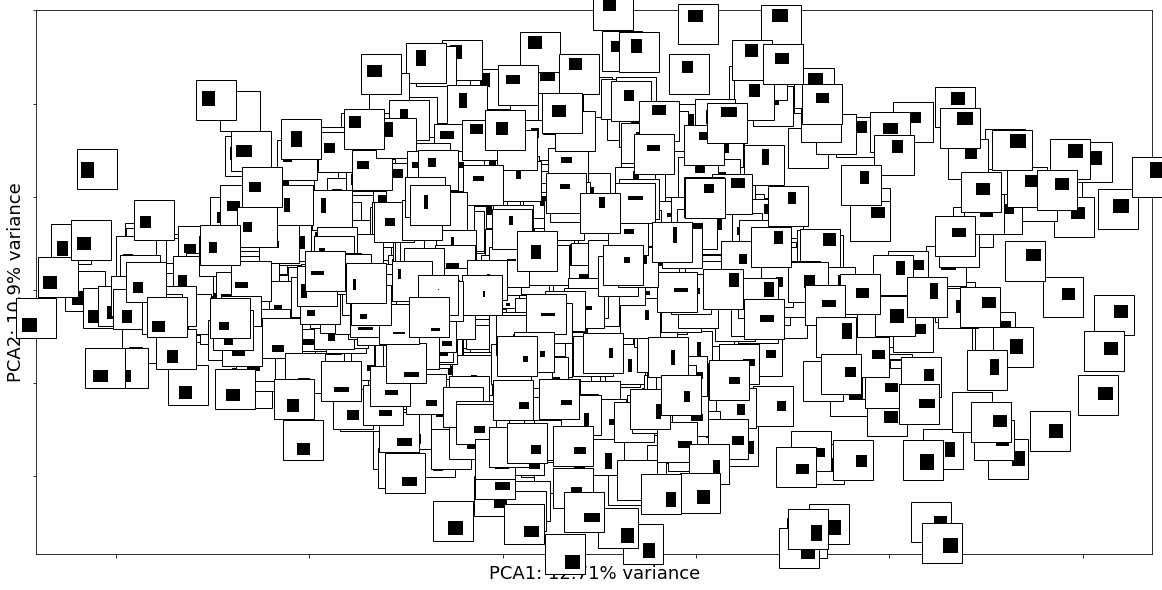

In [8]:
N = 1000

colors = dataset.colors.numpy()
colors = colors[:N]

images_flat = dataset.images.view(60000, -1).numpy()
images_flat = images_flat[:N]
images = dataset.images.numpy()

plotutils.plot_both_embeddings([images_flat], subtitles=['colors'], images=images, zoom=1)

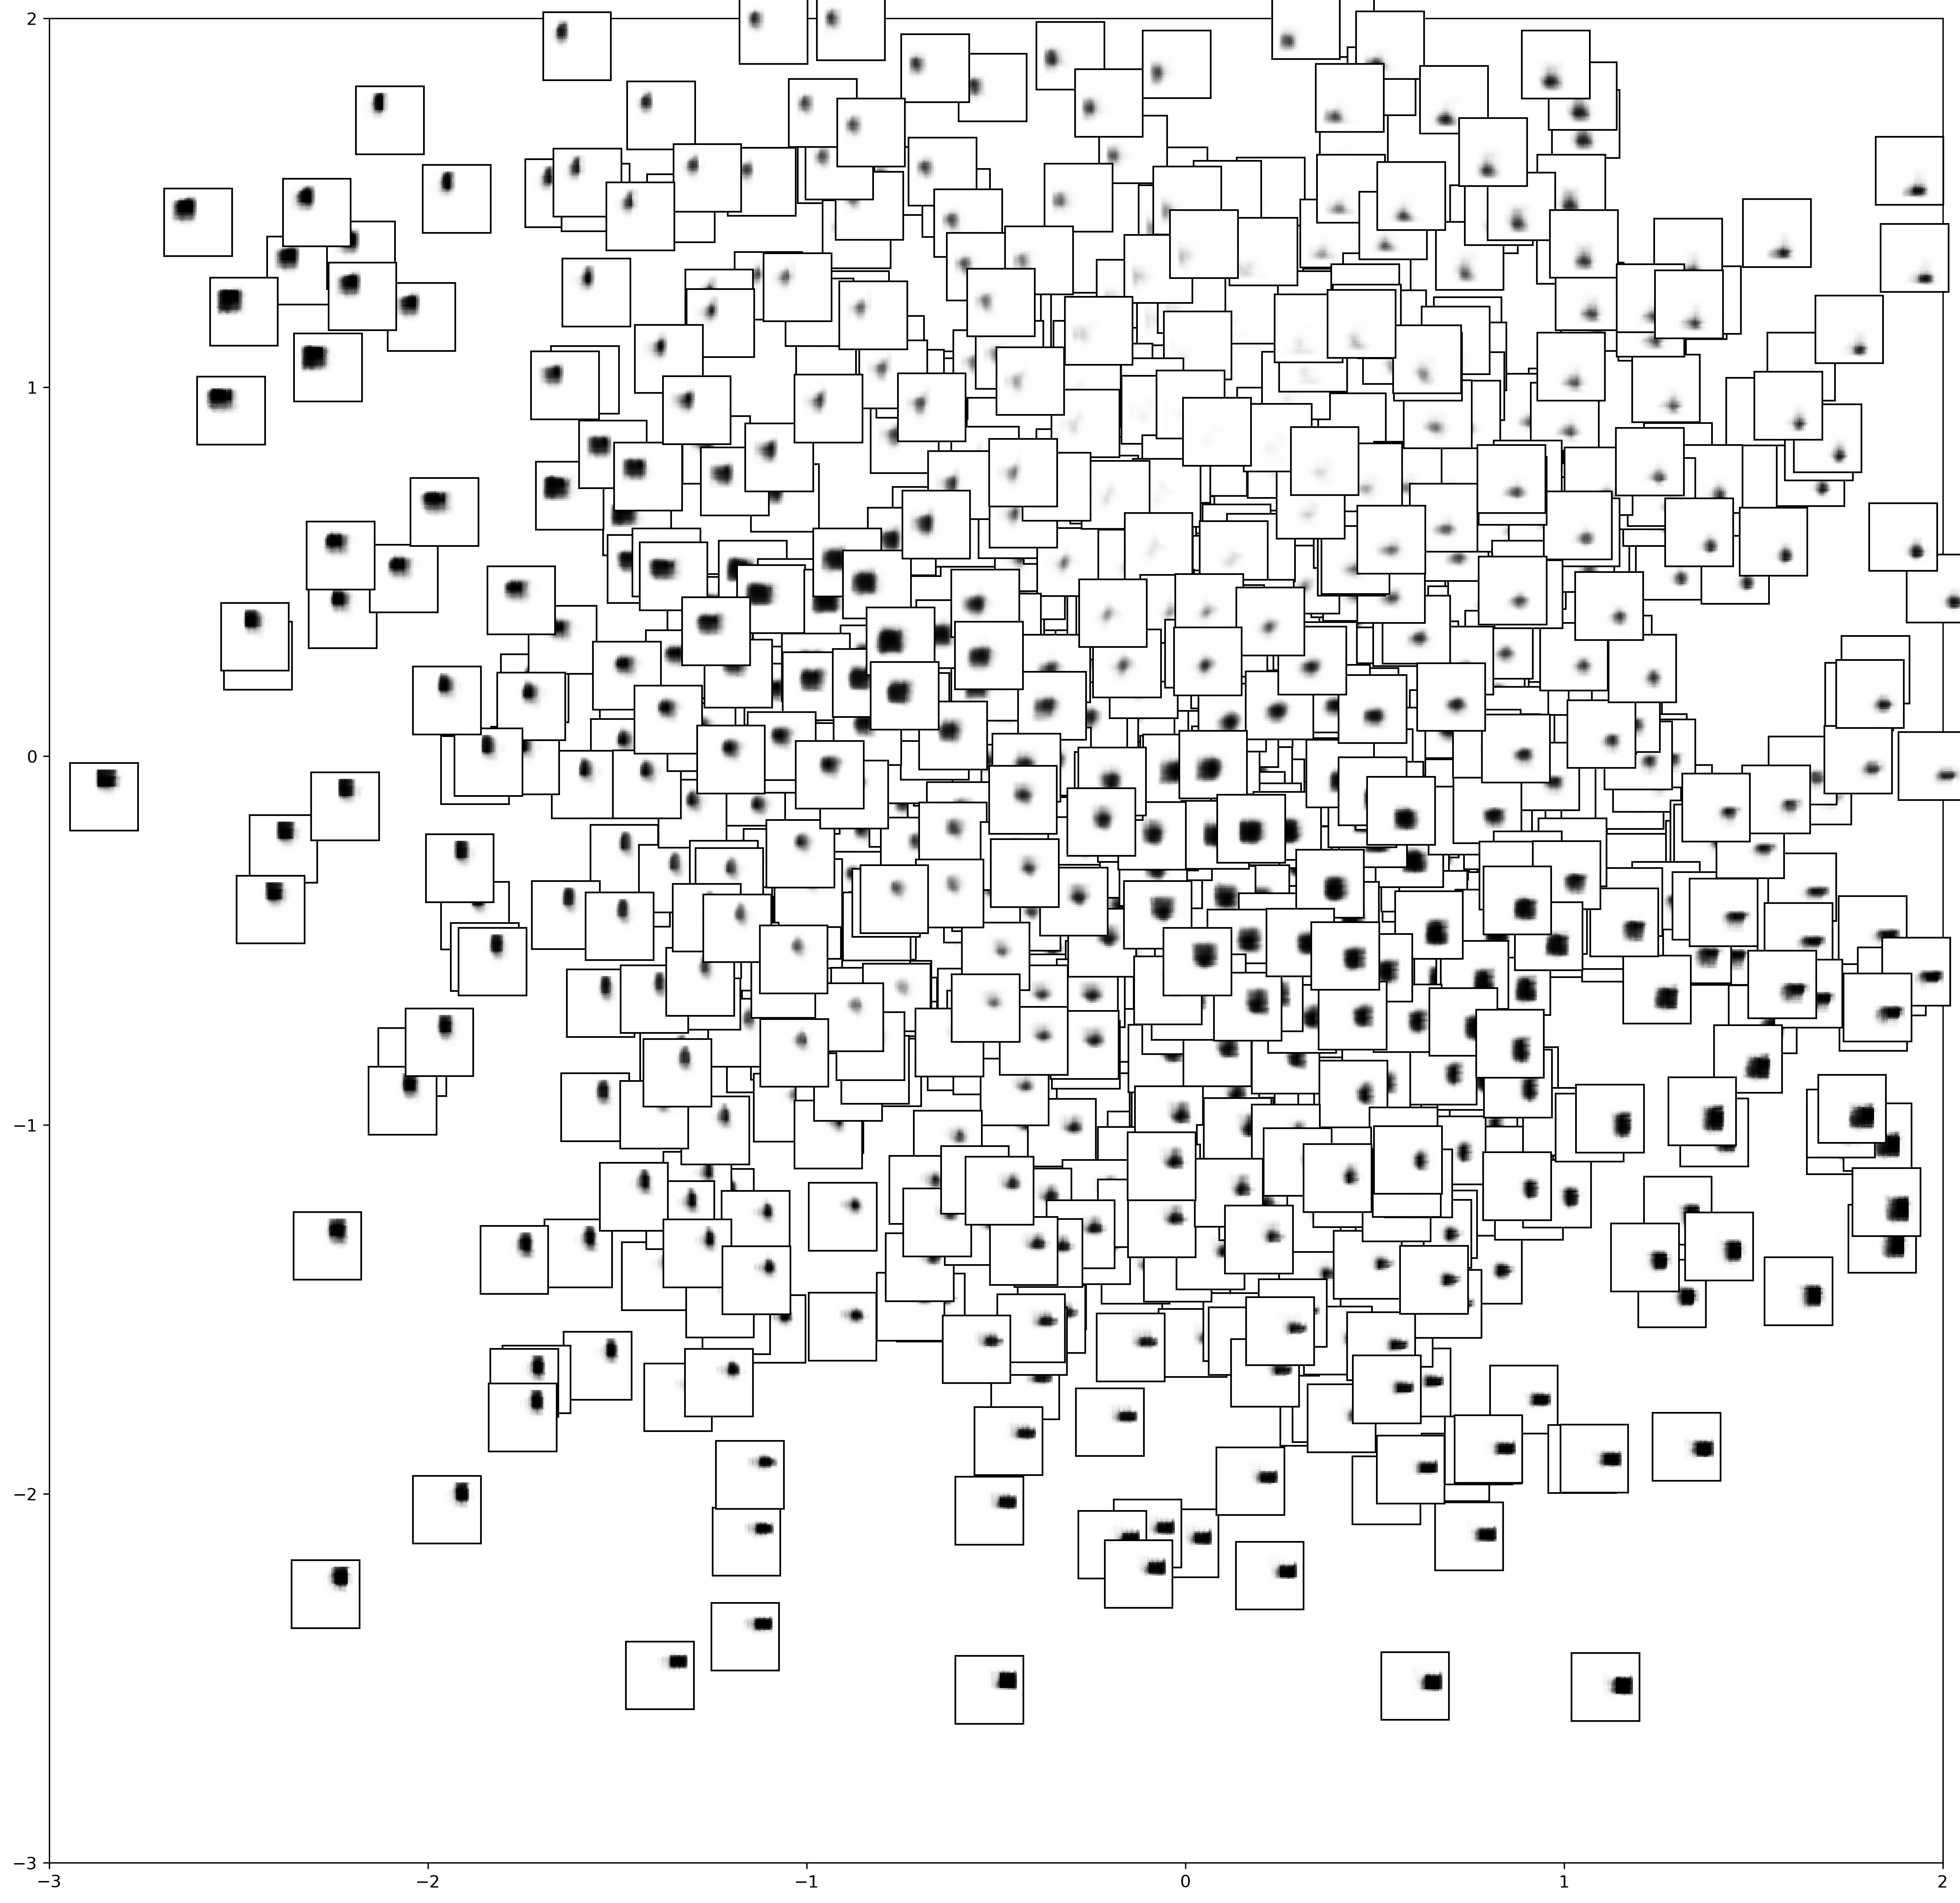

In [9]:
fig, ax = plt.subplots(1, sharex=True, dpi=300)
fig.set_size_inches(20, 20)  # Width, height

samples = torch.randn(N, 2)
images  = model.decode(samples).view(-1, 3, 32, 32).detach().numpy()

Xp = samples[:, 0].numpy()
Yp = samples[:, 1].numpy()

ax.set_xlim([Xp.min().astype(int), Xp.max().astype(int)])
ax.set_ylim([Yp.min().astype(int), Yp.max().astype(int)])

plotutils.imscatter(samples, images, ax)

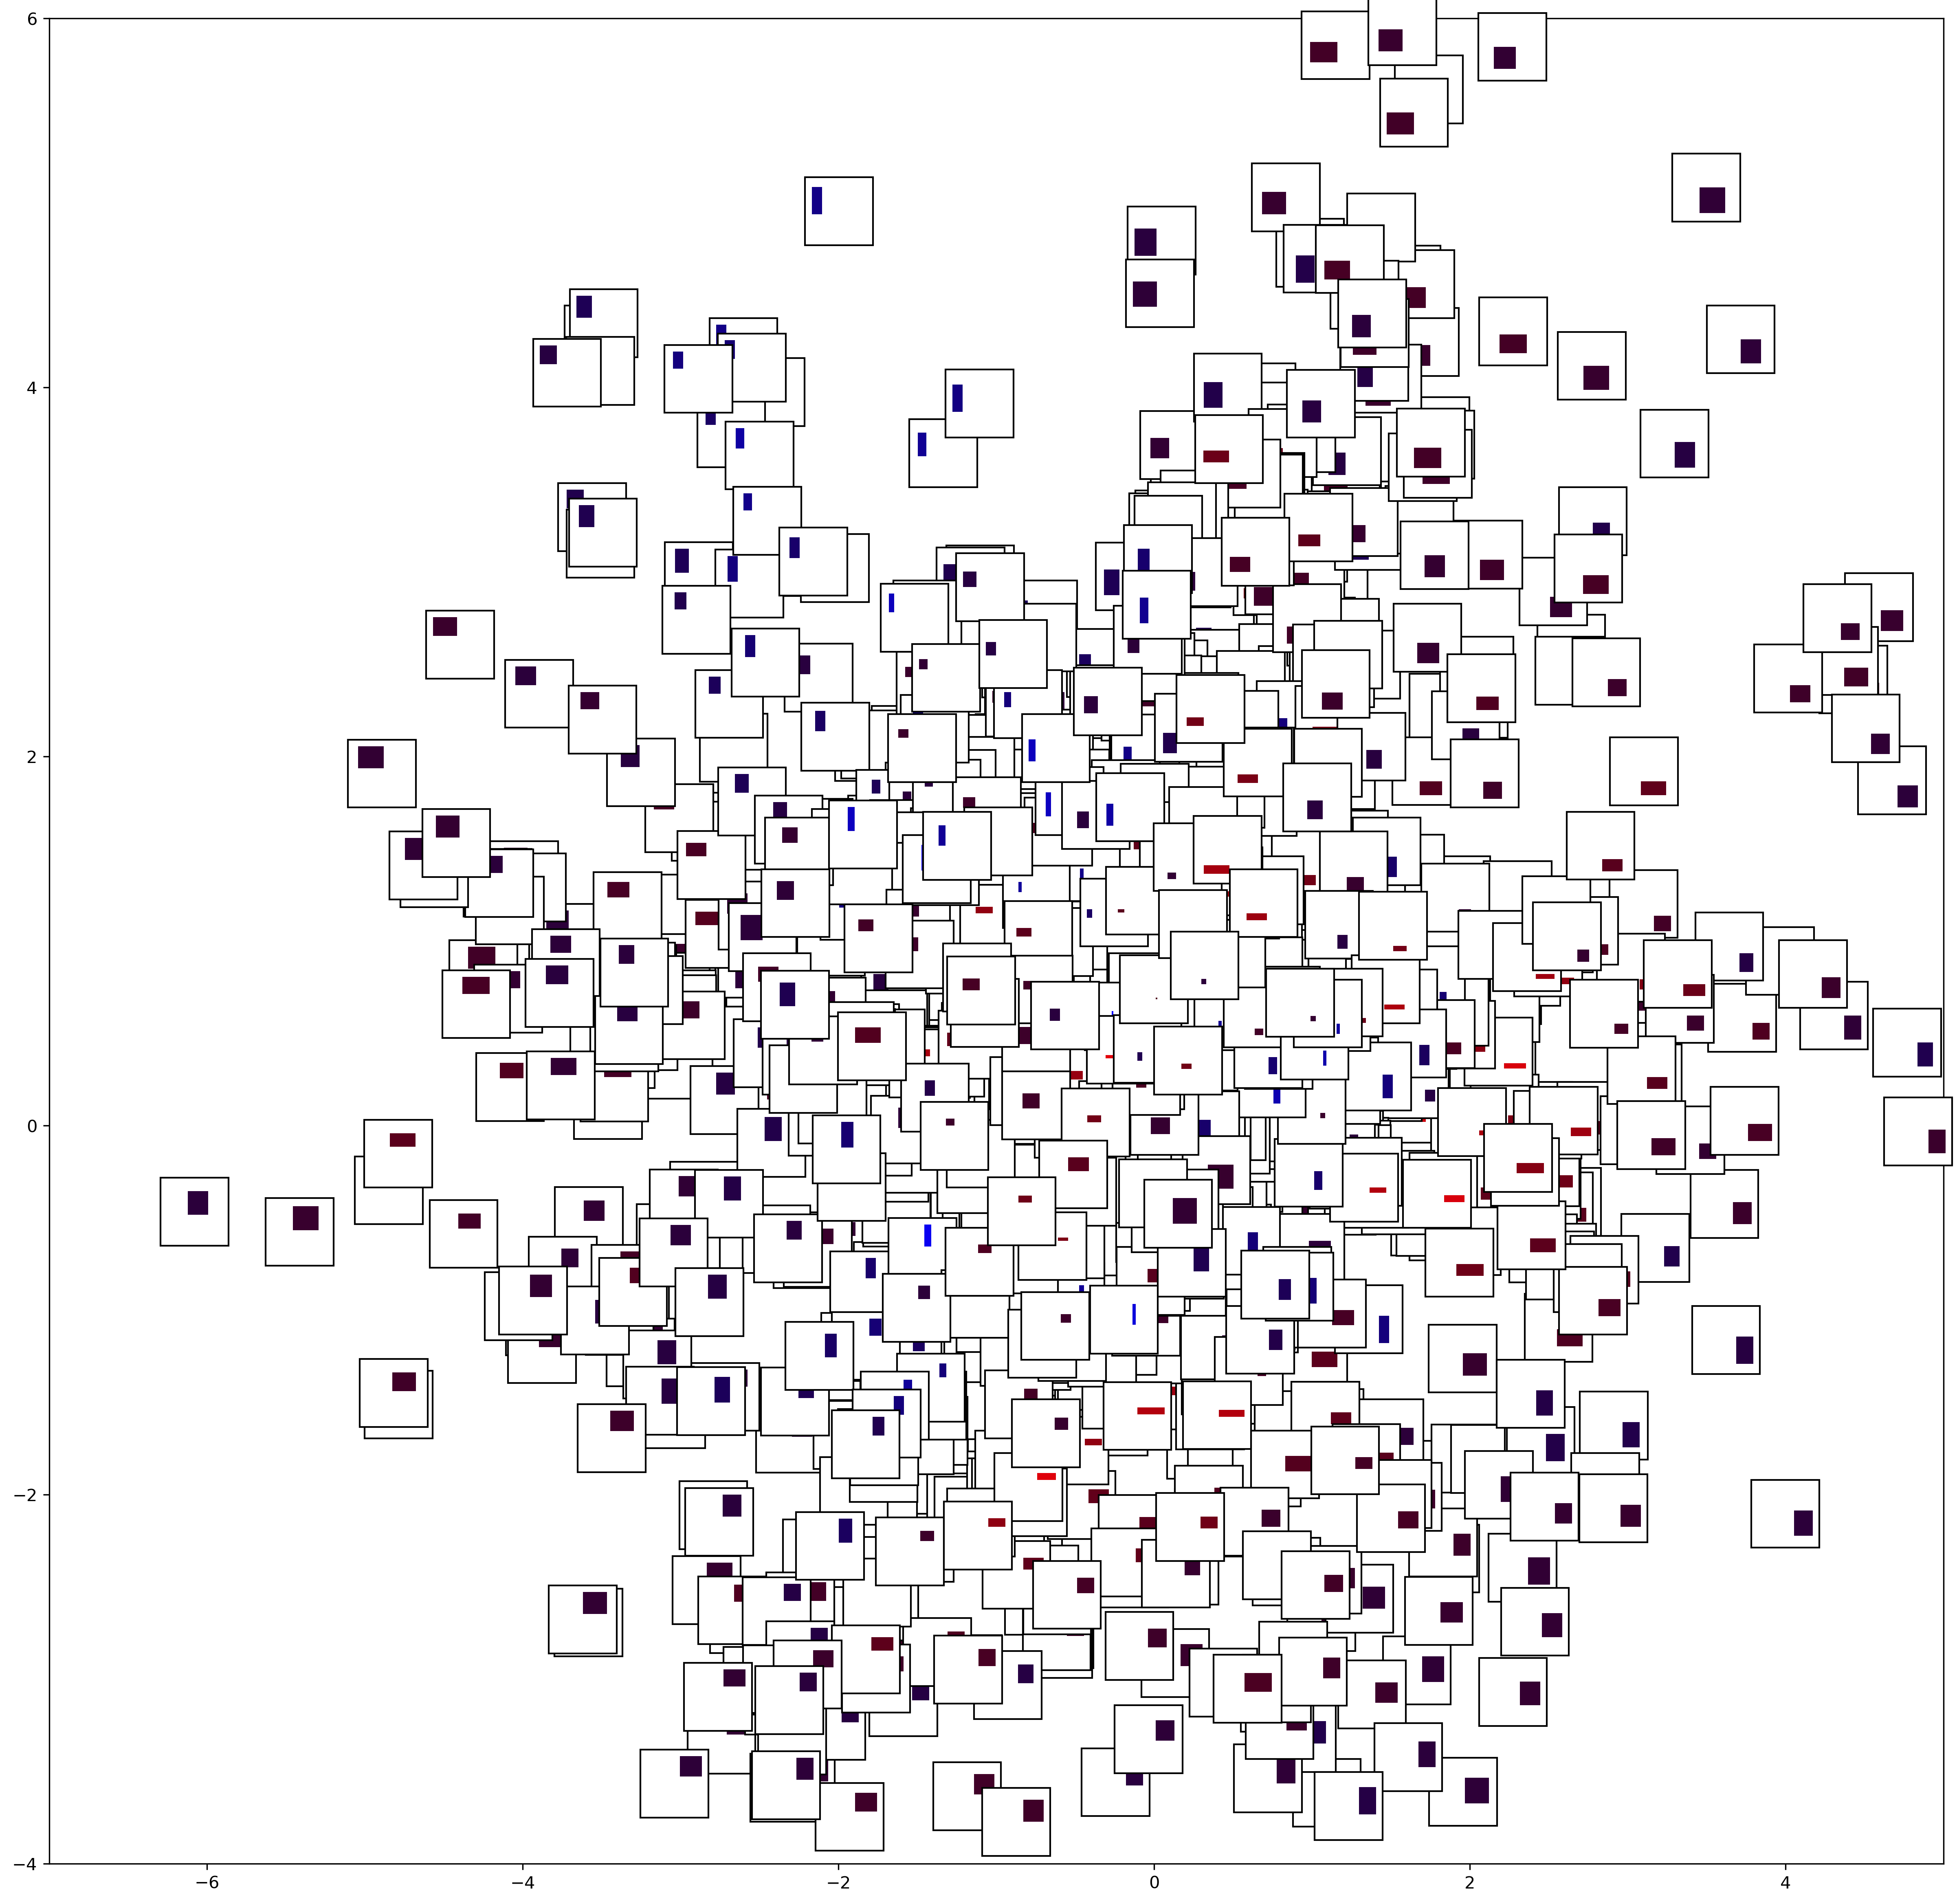

In [11]:
N = 2000

fig, ax = plt.subplots(1, sharex=True, dpi=300)
fig.set_size_inches(20, 20)  # Width, height

colors = dataset.colors[:N]
images = dataset.images[:N]
_, _, _, samples = model.forward(images)

samples = samples.detach().numpy()

Xp = samples[:, 0]
Yp = samples[:, 1]

ax.set_xlim([Xp.min().astype(int), Xp.max().astype(int)])
ax.set_ylim([Yp.min().astype(int), Yp.max().astype(int)])

for i, (img, color) in enumerate(zip(images, colors)):
    img[0][img[0] == 0] = color[0]
    img[1][img[1] == 0] = 0  # Ignore the green channel. It's just noise.
    img[2][img[2] == 0] = color[2]

plotutils.imscatter(samples, images.numpy(), ax)